In [7]:
%matplotlib notebook
%matplotlib inline
import numpy as np
from numpy import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

####################################################
# This part is just for reference if
# you are interested where the data is
# coming from
# The plot is at the bottom
#####################################################
samples=[]
for a in np.arange(0,1,0.075):
    for b in np.arange(0,1-a,0.075):
        if a!=0 and b!=0 and 1-a-b!=0:
            samples.append([a,b,1-a-b])
samples=np.array(samples)

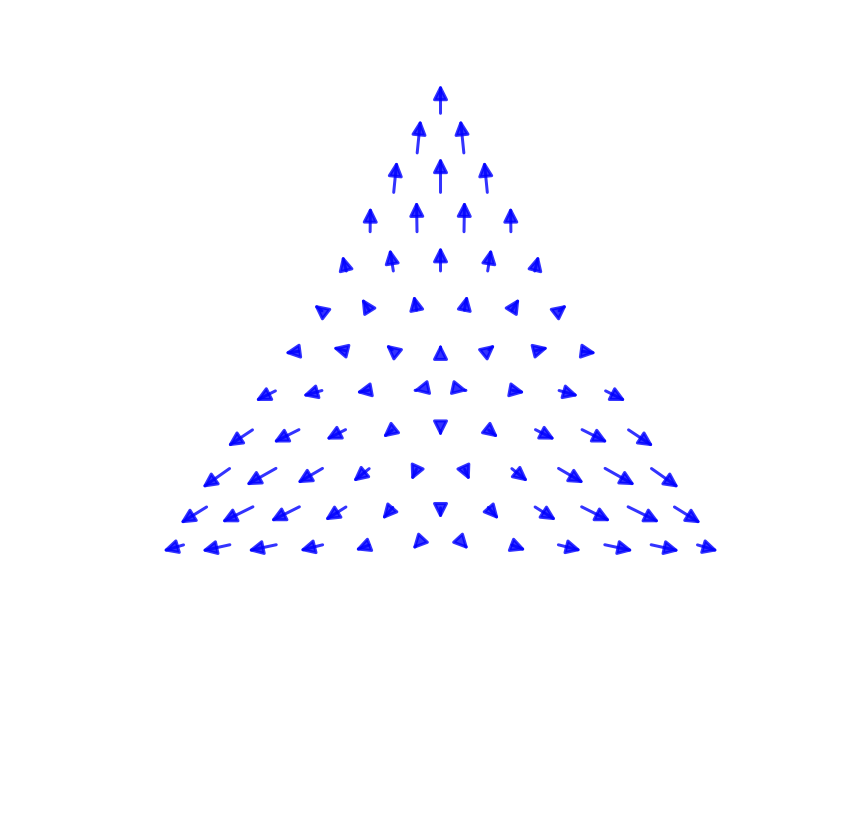

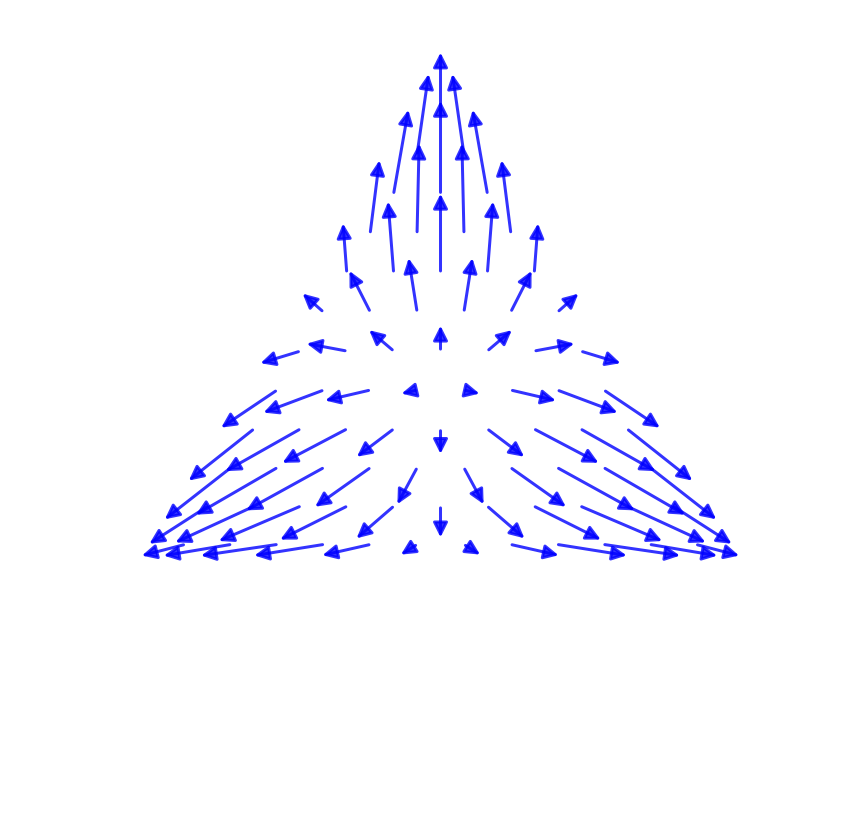

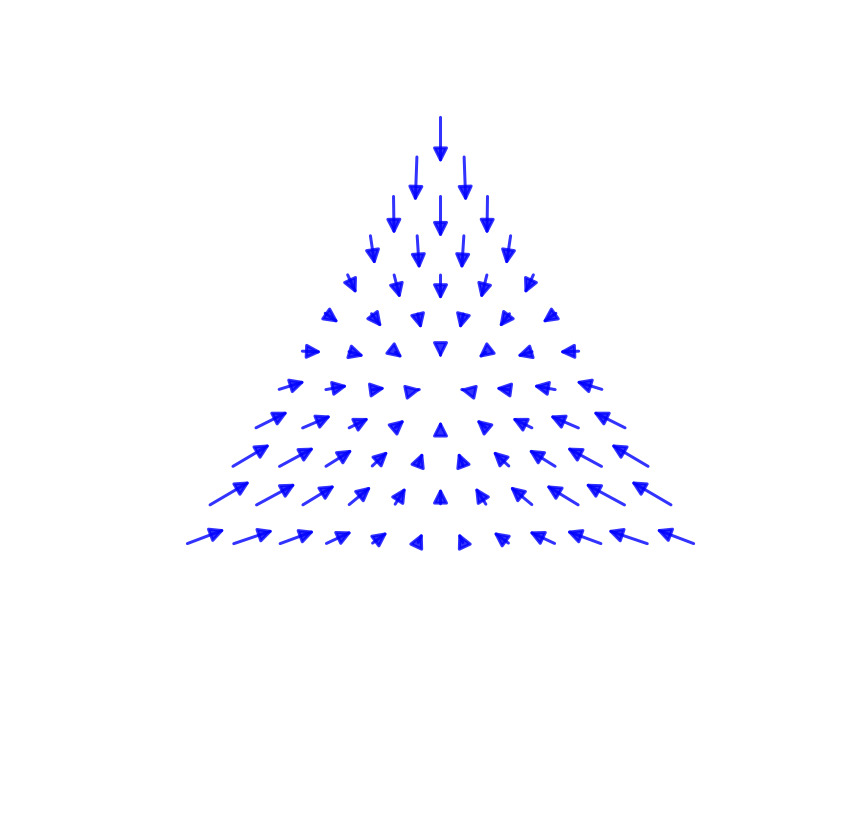

In [9]:
for tau in [1.25,1.75,0.75]:
    
    bifs = []
    for sample in samples:
        sample = [el**tau for el in sample]
        bifs.append(sample/np.sum(sample))
    bifs = np.array(bifs)

    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, projection='3d')
    if tau == 1:
        ax.plot(samples[:,0], samples[:,1], samples[:,2], 'o', markersize=10, color='b', alpha=1)
#     ax.plot(bifs[:,0], bifs[:,1], bifs[:,2], 'o', markersize=10, color='r', alpha=0.2)
    if tau != 1:
        for i in range(len(bifs)):
            #ax.plot([mean_x,v[0]], [mean_y,v[1]], [mean_z,v[2]], color='red', alpha=0.8, lw=3)
            #I will replace this line with:
            a = Arrow3D([samples[i,0], bifs[i,0]], [samples[i,1],  bifs[i,1]], 
                        [samples[i,2],  bifs[i,2]], mutation_scale=30, 
                        lw=3, arrowstyle="-|>", color="b", alpha=0.8)
            ax.add_artist(a)

    ax.grid(False)

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    plt.axis('off')

    ax.view_init(elev=45., azim=45)
    plt.savefig(f"tau{tau}.png", bbox_inches = 'tight', dpi=200)

In [7]:
points = np.mgrid[0:1:0.1, 0:1:0.1, 0:1:0.1].reshape(3,1000).T
samples = []
for point in points:
    if np.sum(point) == 1:
        samples.append(point)
samples = np.array(samples)

bifs = []
for sample in samples:
    sample = [el**tau for el in sample]
    bifs.append(sample/np.sum(sample))
bifs = np.array(bifs)

In [20]:
samples2d = []
for sample in samples:
    print(sample)
    samples2d.append([np.sqrt(sample[0]**2 + sample[1]**2), np.sqrt(3) * sample[2]])
samples2d = np.array(samples2d)

[ 0.   0.1  0.9]
[ 0.   0.2  0.8]
[ 0.   0.3  0.7]
[ 0.   0.4  0.6]
[ 0.   0.5  0.5]
[ 0.   0.6  0.4]
[ 0.   0.7  0.3]
[ 0.   0.8  0.2]
[ 0.   0.9  0.1]
[ 0.1  0.   0.9]
[ 0.1  0.1  0.8]
[ 0.1  0.2  0.7]
[ 0.1  0.3  0.6]
[ 0.1  0.4  0.5]
[ 0.1  0.5  0.4]
[ 0.1  0.6  0.3]
[ 0.1  0.7  0.2]
[ 0.1  0.8  0.1]
[ 0.1  0.9  0. ]
[ 0.2  0.   0.8]
[ 0.2  0.1  0.7]
[ 0.2  0.2  0.6]
[ 0.2  0.3  0.5]
[ 0.2  0.4  0.4]
[ 0.2  0.5  0.3]
[ 0.2  0.6  0.2]
[ 0.2  0.8  0. ]
[ 0.3  0.   0.7]
[ 0.3  0.1  0.6]
[ 0.3  0.2  0.5]
[ 0.3  0.3  0.4]
[ 0.3  0.4  0.3]
[ 0.3  0.5  0.2]
[ 0.3  0.7  0. ]
[ 0.4  0.   0.6]
[ 0.4  0.1  0.5]
[ 0.4  0.2  0.4]
[ 0.4  0.3  0.3]
[ 0.4  0.4  0.2]
[ 0.4  0.5  0.1]
[ 0.4  0.6  0. ]
[ 0.5  0.   0.5]
[ 0.5  0.1  0.4]
[ 0.5  0.2  0.3]
[ 0.5  0.3  0.2]
[ 0.5  0.4  0.1]
[ 0.5  0.5  0. ]
[ 0.6  0.   0.4]
[ 0.6  0.1  0.3]
[ 0.6  0.2  0.2]
[ 0.6  0.4  0. ]
[ 0.7  0.   0.3]
[ 0.7  0.1  0.2]
[ 0.7  0.3  0. ]
[ 0.8  0.   0.2]
[ 0.8  0.1  0.1]
[ 0.8  0.2  0. ]
[ 0.9  0.   0.1]
[ 0.9  0.1  0.

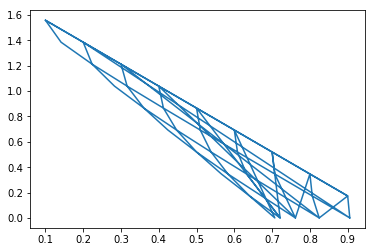

In [19]:
plt.plot(samples2d[:,0],samples2d[:,1])

In [13]:
points2d

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.14142136],
       [ 0.        ,  0.28284271],
       ..., 
       [ 1.27279221,  0.98994949],
       [ 1.27279221,  1.13137085],
       [ 1.27279221,  1.27279221]])

In [31]:
points = np.mgrid[0:np.sqrt(3):0.01, 0:np.sqrt(3):0.01].reshape(2,174*174).T

In [32]:
samples = []
for point in points:
    x,y = point
    if y >= 0 and y <= np.sqrt(3) * x and y <= -np.sqrt(3) * x + np.sqrt(3):
        samples.append(point)
samples = np.array(samples)

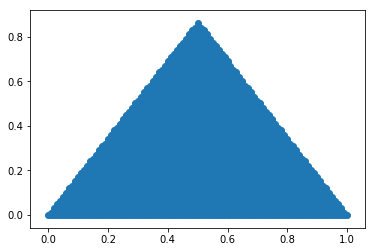

In [33]:
plt.scatter(samples[:,0],samples[:,1])